# Task 4: Prediction Using Decision Tree Algorithm

Decision Tree is an algorithm that can perform both Classification and regression tasks. For the given task I have used "Iris" dataset and perform Decision Tree classifier and visualized it graphically. The main objective of the problem is that if we feed new data into the classifier then it would be able to predict right class accordingly.

## Importing the Important libraries

In [4]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pydot
from IPython.display import Image

## Import Dataset

In [7]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [8]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
df.columns = ['Sepal_len', 'Sepal_wd', 'Petal_len', 'Petal_wd', 'Species']
df.head()

,Sepal_len,Sepal_wd,Petal_len,Petal_wd,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [13]:
df.shape

(149, 5)

In [14]:
df.describe()

,Sepal_len,Sepal_wd,Petal_len,Petal_wd
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [19]:
df['Species'] = df['Species'].map(species)

In [20]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [25]:
X = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:, -1].values

In [26]:
X.shape, y.shape

((149, 4), (149,))

## Data Visualization

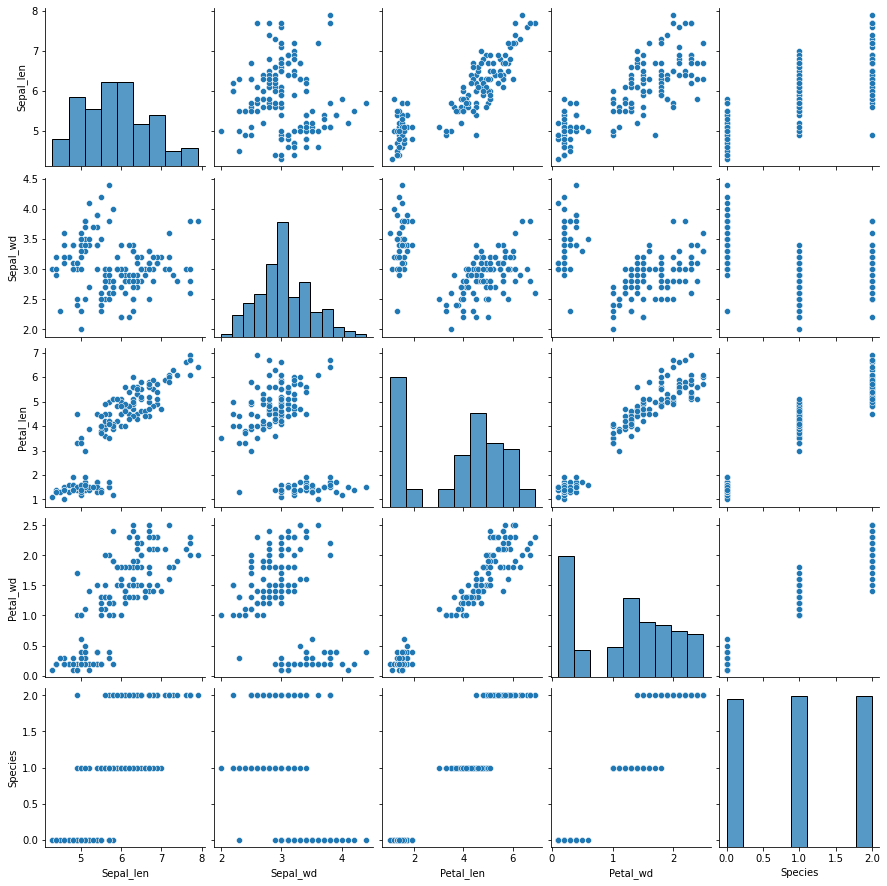

In [27]:
sns.pairplot(df)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


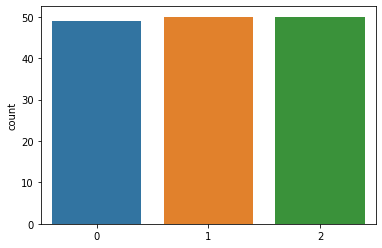

In [28]:
sns.countplot(y)
plt.show()

From above we can obeserve that dataset is completely balanced

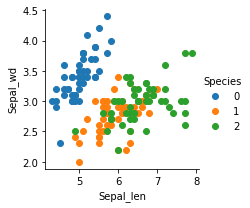

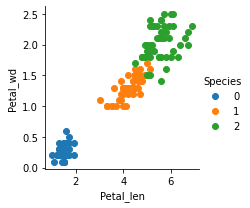

In [32]:
 # Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Sepal_len','Sepal_wd').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Petal_len','Petal_wd').add_legend()
plt.show()

## Decision Tree Model Training

In [34]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print("Training Complete.")
y_pred = model.predict(X_test)

Training Complete.


## Comparing the Actual and Predicted flower classification

In [36]:
duf = pd.DataFrame({'Actual': y_test, 'Predicyed': y_pred})
duf

,Actual,Predicyed
0,2,2
1,1,1
2,1,1
3,1,1
4,1,1
5,2,1
6,1,1
7,1,1
8,0,0
9,1,1


## Visualizing the Trained Model

In [39]:
from sklearn import tree

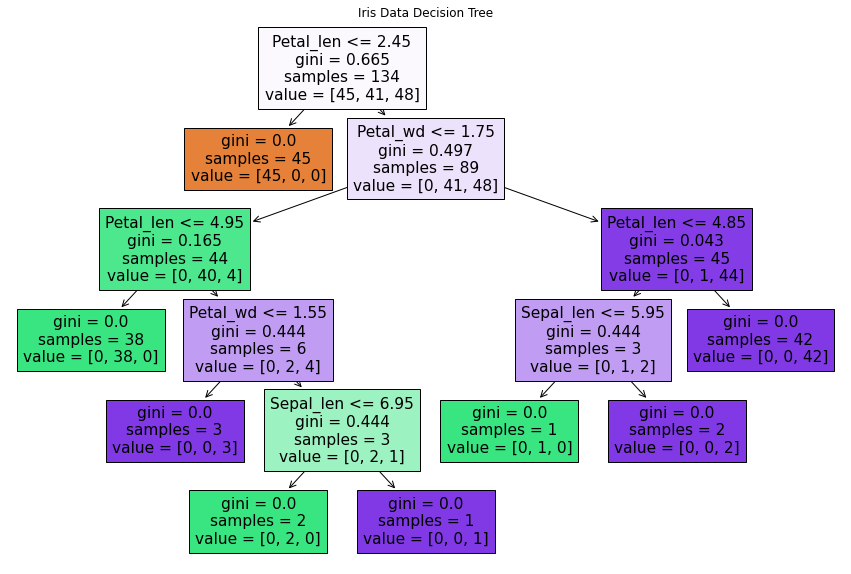

In [43]:
#Visualizing the trained Decision Tree Classifier taking all 4 features in consideration
plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = df.iloc[:, [0,1,2,3]].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()

## Predicting the class output for some random values of petal and sepal length and width

In [50]:
print("Class Names = ",df.Species)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',model.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  0      0
1      0
2      0
3      0
4      0
      ..
144    2
145    2
146    2
147    2
148    2
Name: Species, Length: 149, dtype: int64

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


## Calculate the Model Accuracy

In [51]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


This model has accuracy of 93.33 percentage, as we have taken all the 4 features into the consideration for creating the decision tree model

### I was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.